In [1]:
#import used librabries and training data
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
csv = np.genfromtxt ('census_train.csv', delimiter=",")
print(csv)
column_names = ['idnum','age','workerclass','interestincome','traveltimetowork','vechicleoccupancy','meansoftransport','marital','schoolenrollment','educationalattain','sex','workarrivaltime','hoursworkperweek','ancestry','degreefield','industryworkedin','wages']
normal_data= pd.DataFrame(csv, columns=column_names)
train_df = pd.DataFrame(csv, columns=column_names)

[[0.000e+00 5.800e+01 3.000e+00 ... 2.300e+03 7.870e+03 1.100e+05]
 [1.000e+00 3.400e+01 3.000e+00 ...       nan 7.860e+03 3.450e+04]
 [2.000e+00 5.700e+01 2.000e+00 ...       nan 8.390e+03 4.700e+03]
 ...
 [1.401e+03 7.200e+01       nan ... 6.107e+03       nan 0.000e+00]
 [1.402e+03 3.700e+01 2.000e+00 ... 5.506e+03 8.370e+03 2.200e+04]
 [1.403e+03 3.900e+01 1.000e+00 ...       nan 5.790e+03 1.500e+05]]


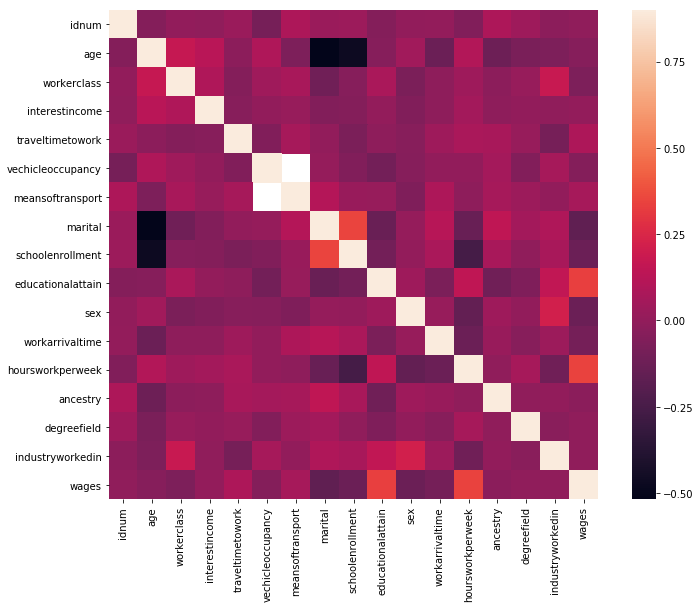

In [2]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
corr_matrix = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

In [3]:
# To see how many Nan values are in the Training data
print(train_df.isnull().sum())
# dropping 'vechicleoccupancy' column as it has high coorelation with meansoftransport
train_df.drop(['vechicleoccupancy'],axis=1,inplace=True)


idnum                  0
age                    0
workerclass          378
interestincome         0
traveltimetowork     576
vechicleoccupancy    775
meansoftransport     543
marital                0
schoolenrollment       0
educationalattain      0
sex                    0
workarrivaltime      576
hoursworkperweek     465
ancestry               0
degreefield          766
industryworkedin     378
wages                  0
dtype: int64


In [ ]:
#---------------------------Dealing with Outliers-----------------------------------------------------


Text(0,0.5,'wages')

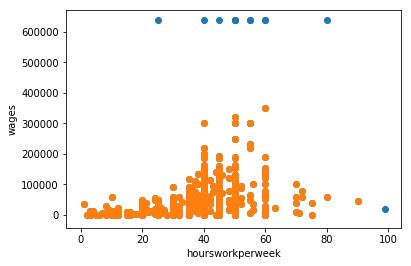

In [4]:
plt.scatter(train_df['hoursworkperweek'],train_df['wages'])
plt.xlabel('hoursworkperweek')
plt.ylabel('wages')
train_df = train_df.drop(train_df[(train_df['hoursworkperweek']>90) & (train_df['wages']<400000)].index)
train_df = train_df.drop(train_df[ (train_df['wages']>600000)].index)
# PRINTED DATA AND SAW THAT VALUE FOR WAGES  HAVE HOURPERWEEK GREATER THEN 0 so what should we do it is with class 6 only which are self employed !!
#rain_df = train_df.drop(train_df[(train_df['hoursworkperweek']>0) & (train_df['wages']==0)].index)
plt.scatter(train_df['hoursworkperweek'],train_df['wages'])
plt.xlabel('hoursworkperweek')
plt.ylabel('wages')

Text(0,0.5,'wages')

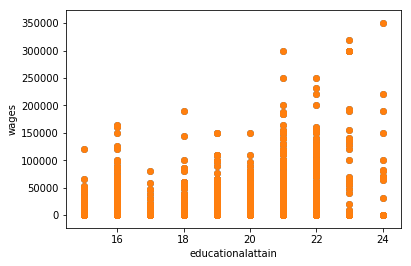

In [5]:
plt.scatter(train_df['educationalattain'],train_df['wages'])
plt.xlabel('educationalattain')
plt.ylabel('wages')
train_df = train_df.drop(train_df[(train_df['wages']>600000)].index)
plt.scatter(train_df['educationalattain'],train_df['wages'])
plt.xlabel('educationalattain')
plt.ylabel('wages')

(1169, 16)

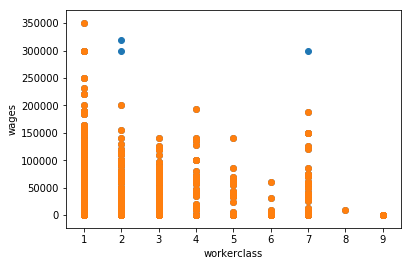

In [6]:
plt.scatter(train_df['workerclass'],train_df['wages'])
plt.xlabel('workerclass')
plt.ylabel('wages')
train_df = train_df.drop(train_df[(train_df['workerclass']>1.5) & (train_df['wages']>270000)].index)
plt.scatter(train_df['workerclass'],train_df['wages'])
plt.xlabel('workerclass')
plt.ylabel('wages')
train_df.shape

(1168, 16)

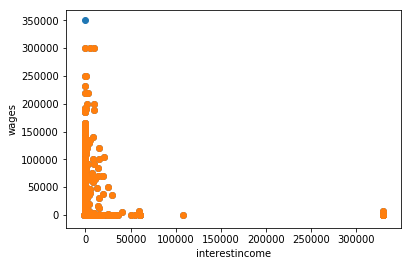

In [7]:
plt.scatter(train_df['interestincome'],train_df['wages'])
plt.xlabel('interestincome')
plt.ylabel('wages')
train_df = train_df.drop(train_df[(train_df['interestincome']<10000) & (train_df['wages']>330000)].index)
plt.scatter(train_df['interestincome'],train_df['wages'])
plt.xlabel('interestincome')
plt.ylabel('wages')
train_df.shape

Text(0,0.5,'wages')

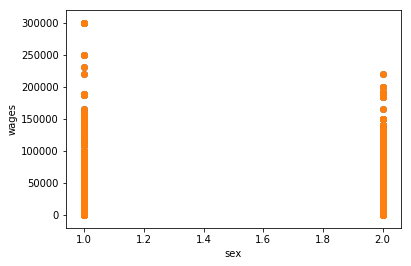

In [8]:
plt.scatter(train_df['sex'],train_df['wages'])
plt.xlabel('sex')
plt.ylabel('wages')
train_df = train_df.drop(train_df[(train_df['sex']==1) & (train_df['wages']>300000)].index)
plt.scatter(train_df['sex'],train_df['wages'])
plt.xlabel('sex')
plt.ylabel('wages')


In [10]:
#--------------------------------------Importing Test data

(507, 17)
(507, 16)


In [11]:
Test_data = np.genfromtxt ('census_test.csv', delimiter=",")
#print(Test_data)
column_names = ['idnum','age','workerclass','interestincome','traveltimetowork','vechicleoccupancy','meansoftransport','marital','schoolenrollment','educationalattain','sex','workarrivaltime','hoursworkperweek','ancestry','degreefield','industryworkedin']
test_df = pd.DataFrame(Test_data, columns=column_names)
test_df.drop(['vechicleoccupancy'],axis=1,inplace=True)
frames = [train_df.iloc[:,0:15], test_df]
#Concating test and training data to do Encoding!
result = pd.concat(frames,sort=False)
print(result.shape)
print(test_df.shape)

(1668, 15)
(500, 15)


In [12]:
# Substituting for Nan values in Both Trainiing and testing data

In [13]:

After_prepro=result.copy()
#1 for workerclass attribute
#for putting a category for age <16
After_prepro.loc[After_prepro.age<16,['workerclass']]=0
#for putting a category for people not in labor force
After_prepro.workerclass.fillna(value=10,inplace=True)

#2 for interestincome attribute
After_prepro.interestincome.fillna(value=0,inplace=True)

#3 for traveltimetowork atribute
After_prepro.traveltimetowork.fillna(value=0,inplace=True)

#5 for meansoftransport attribute
# add a category 0 for na
After_prepro.meansoftransport.fillna(value=0,inplace=True)

#6 for schoolenrollment attribute
# add a category 0 for na
After_prepro.schoolenrollment.fillna(value=0,inplace=True)

#7 for educationattain attribute
# add a category 0 for na
After_prepro.educationalattain.fillna(value=0,inplace=True)

#8 for workerarrivaltime
After_prepro.loc[After_prepro.workerclass==0,['workarrivaltime']]=0
After_prepro.loc[After_prepro.workerclass==9,['workarrivaltime']]=0
#After_prepro.workarrivaltime[After_prepro['workerclass']==0 or After_prepro['workerclass']==9].fillna(value=0,inplace=True)
After_prepro.workarrivaltime.fillna(value=286,inplace=True)

#9 for hoursworkperweek
After_prepro.hoursworkperweek.fillna(value=0,inplace=True)

#10 for degreefield
After_prepro.degreefield.fillna(value=0,inplace=True)

#11 for industryworkin
After_prepro.loc[After_prepro.workerclass==0,['industryworkedin']]=0
After_prepro.loc[After_prepro.workerclass==9,['industryworkedin']]=0
#After_prepro.industryworkedin[After_prepro['workerclass']==0 or After_prepro['workerclass']==9].fillna(value=0,inplace=True)
After_prepro.industryworkedin.fillna(value=11,inplace=True)


      idnum   age  workerclass  interestincome  traveltimetowork  \
0       0.0  58.0          3.0             0.0              40.0   
1       1.0  34.0          3.0             0.0              10.0   
2       2.0  57.0          2.0             0.0              15.0   
3       3.0  17.0          NaN             0.0               NaN   
4       4.0  42.0          1.0             0.0              20.0   
5       5.0  18.0          NaN             0.0               NaN   
6       6.0  67.0          1.0          9500.0               NaN   
7       7.0  21.0          2.0             0.0               NaN   
8       8.0  18.0          1.0             0.0               5.0   
9      10.0  43.0          2.0             0.0              50.0   
10     11.0  83.0          NaN             0.0               NaN   
11     12.0  71.0          7.0          3100.0               1.0   
12     14.0  47.0          7.0             0.0              30.0   
13     15.0  69.0          6.0             0.0  

In [14]:
# --------------------------------Doing bindary encoding of categorial columns
import category_encoders as ce
df1 = After_prepro.copy()
df1=df1.iloc[:,1:]
ce.BinaryEncoder


encoder = ce.BinaryEncoder(cols=['industryworkedin'])
df_binary0 = encoder.fit_transform(df1)

encoder = ce.BinaryEncoder(cols=['degreefield'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['ancestry'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['workarrivaltime'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['sex'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['educationalattain'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['schoolenrollment'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['marital'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['meansoftransport'])
df_binary0 = encoder.fit_transform(df_binary0)

encoder = ce.BinaryEncoder(cols=['workerclass'])
df_binary0 = encoder.fit_transform(df_binary0)

df_binary0.head()



workerclass_0  workerclass_1  workerclass_2  workerclass_3  workerclass_4  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              1              0   
3              0              0              0              1              1   
4              0              0              1              0              0   

   meansoftransport_0  meansoftransport_1  meansoftransport_2  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   meansoftransport_3  meansoftransport_4        ...         \
0                   0                   1        ...          
1                   0                   1        ...          
2                   0                   1        ...          
3                   1                   0        ...          
4                   0                   1        ...          

   industryworkedin_3  industryworkedin_4  industryworkedin_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   industryworkedin_6  industryworkedin_7  industryworkedin_8   age  \
0                   0                   0                   1  58.0   
1                   0                   1                   0  34.0   
2                   0                   1                   1  57.0   
3                   1                   0                   0  17.0   
4                   1                   0                   1  42.0   

   interestincome  traveltimetowork  hoursworkperweek  
0             0.0              40.0              40.0  
1             0.0              10.0              40.0  
2             0.0              15.0              30.0  
3             0.0               0.0               0.0  
4             0.0              20.0              45.0  

[5 rows x 62 columns]

In [15]:
# after filling Nan values and encoding for categorial features, split the data again in training and testing data
Train_df_Binary=df_binary0.iloc[0:1168,:]
Test_df_Binary=df_binary0.iloc[1168:,:]
print(Train_df_Binary.shape)
print(Test_df_Binary.shape)

(1168, 62)
(500, 62)


In [16]:
df_binary=Train_df_Binary.copy()
df_binary['wages']=train_df['wages']
df_binary

workerclass_0  workerclass_1  workerclass_2  workerclass_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              1   
3                 0              0              0              1   
4                 0              0              1              0   
5                 0              0              0              1   
6                 0              0              1              0   
7                 0              0              0              1   
8                 0              0              1              0   
9                 0              0              0              1   
10                0              0              0              1   
11                0              0              1              0   
12                0              0              1              0   
13                0              0              1              1   
14                0              0              1              1   
15                0              0              1              0   
16                0              0              1              0   
17                0              0              0              1   
18                0              1              0              0   
19                0              0              0              1   
20                0              0              1              0   
21                0              0              1              0   
22                0              0              1              0   
23                0              0              0              1   
24                0              0              0              1   
25                0              0              0              1   
26                0              0              0              1   
27                0              0              0              1   
28                0              0              1              0   
29                0              0              1              0   
...             ...            ...            ...            ...   
1154              0              0              1              0   
1155              0              0              1              0   
1156              0              0              1              0   
1157              0              0              1              0   
1158              0              0              0              1   
1159              0              0              0              0   
1160              0              0              0              1   
1161              0              0              1              0   
1162              0              1              0              0   
1163              0              1              0              0   
1164              0              1              0              0   
1165              0              0              0              0   
1166              0              0              0              1   
1167              0              0              1              1   
1168              0              0              0              0   
1169              0              0              1              0   
1170              0              0              0              1   
1171              0              0              0              1   
1172              0              0              0              1   
1173              0              0              0              1   
1174              0              0              0              1   
1175              0              0              0              1   
1176              0              0              1              0   
1177              0              1              0              0   
1178              0              0              1              0   
1179              0              0              1              0   
1180              0              0              0             

In [21]:
# Doing Linear Regression !
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
RMSE_average_KFOLDS=0
print('Linear regresion with 20 KFlod')
from sklearn.cross_validation import KFold
kf = KFold(df_binary.shape[0], n_folds=20,shuffle=True)
x=df_binary.iloc[0:1168,0:62]
y=df_binary.iloc[0:1168,62:63]
i=1
for train_index, test_index in kf:
    trainx= x.iloc[train_index]
    testx = x.iloc[test_index]
    trainy =y.iloc[train_index]
    testy =y.iloc[test_index]
# Create linear regression object
    regr = linear_model.LinearRegression(normalize =True)

# Train the model using the training sets
    regr.fit(trainx, trainy)

# Make predictions using the testing set
    prediction = regr.predict(testx)
    RMSE_average_KFOLDS+=np.sqrt(mean_squared_error(testy, prediction))
    #print('Score for Kfold %d : %f'%(i,regr.score(testx,testy)))
    print('RMSE for Kfold %d : %f'%(i,np.sqrt(mean_squared_error(testy, prediction))))
    i+=1

RMSE_average_KFOLDS=RMSE_average_KFOLDS/20
print('RMSE_average_KFOLDS :',RMSE_average_KFOLDS)




Linear regresion with 20 KFlod
RMSE for Kfold 1 : 32259.116564
RMSE for Kfold 2 : 32755.108010
RMSE for Kfold 3 : 32486.021714
RMSE for Kfold 4 : 32033.590768
RMSE for Kfold 5 : 23690.578575
RMSE for Kfold 6 : 21471.618705
RMSE for Kfold 7 : 30428.214036
RMSE for Kfold 8 : 28029.075518
RMSE for Kfold 9 : 30957.763931
RMSE for Kfold 10 : 35699.795638
RMSE for Kfold 11 : 49052.232375


C:\Users\predator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RMSE for Kfold 12 : 43347.430813
RMSE for Kfold 13 : 29805.244588
RMSE for Kfold 14 : 24823.241525
RMSE for Kfold 15 : 31057.385107
RMSE for Kfold 16 : 32578.871888
RMSE for Kfold 17 : 27322.261054
RMSE for Kfold 18 : 20080.059463
RMSE for Kfold 19 : 24518.433817
RMSE for Kfold 20 : 22199.905039
RMSE_average_KFOLDS : 30229.79745634814


In [ ]:
# Making  Randomforset Regressor Model Training/ validation

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.cross_validation import KFold
kf = KFold(df_binary.shape[0], n_folds=20,shuffle=True)
print('RandomForset regresion with 20 KFlod')
x=df_binary.iloc[0:1168,0:62]
y=df_binary.iloc[0:1168,62:63]
RMSE_average_KFOLDS=0
i=1
for train_index, test_index in kf:
    trainx= x.iloc[train_index]
    testx = x.iloc[test_index]
    trainy =y.iloc[train_index]
    testy =y.iloc[test_index]
    regr = RandomForestRegressor(max_depth=None, random_state=0, n_estimators=50)
    regr.fit(trainx, trainy.values.ravel())
    prediction=regr.predict(testx)
    RMSE_average_KFOLDS+=np.sqrt(mean_squared_error(testy, prediction))
   # print('Score for Kfold %d : %f'%(i,regr.score(testx,testy)))
    print('RMSE for Kfold %d : %f'%(i,np.sqrt(mean_squared_error(testy, prediction))))
    i+=1
    #print(regr.feature_importances_)
RMSE_average_KFOLDS=RMSE_average_KFOLDS/20
print('RMSE_average_KFOLDS :',RMSE_average_KFOLDS)

RandomForset regresion with 20 KFlod
RMSE for Kfold 1 : 21015.055825
RMSE for Kfold 2 : 16947.050675
RMSE for Kfold 3 : 29349.958800
RMSE for Kfold 4 : 35782.966811
RMSE for Kfold 5 : 29772.385037
RMSE for Kfold 6 : 22854.267063
RMSE for Kfold 7 : 22797.610294
RMSE for Kfold 8 : 30248.279075
RMSE for Kfold 9 : 24984.963965
RMSE for Kfold 10 : 24649.587687
RMSE for Kfold 11 : 32938.965652
RMSE for Kfold 12 : 28384.226218
RMSE for Kfold 13 : 36653.649848
RMSE for Kfold 14 : 20756.217547
RMSE for Kfold 15 : 34116.815804
RMSE for Kfold 16 : 30458.406283
RMSE for Kfold 17 : 36795.039898
RMSE for Kfold 18 : 30365.697554
RMSE for Kfold 19 : 26778.249907
RMSE for Kfold 20 : 23004.686666
RMSE_average_KFOLDS : 27932.70403057317


In [45]:
######################################################################
#making RandomForset Regressor Model on whole training set! and Then Predicting on Test set!

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


x=df_binary.iloc[0:1161,0:62]
y=df_binary.iloc[0:1161,62:63]
regr = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=20)
regr.fit(x, y.values.ravel())

prediction=regr.predict(Test_df_Binary)
prediction

array([1.23657767e+00, 4.78976884e+04, 5.47840160e+04, 1.23657767e+00,
       5.26897047e+04, 5.63924164e+04, 1.23657767e+00, 4.54404847e+04,
       1.23657767e+00, 1.23657767e+00, 2.00543133e+04, 1.23657767e+00,
       3.99276794e+04, 2.68117326e+04, 5.17504586e+04, 6.55246659e+04,
       4.32061235e+04, 1.23657767e+00, 1.03269864e+04, 1.02678865e+05,
       1.51337810e+04, 1.23657767e+00, 5.61595124e+04, 1.52960958e+03,
       1.23657767e+00, 1.62758977e+04, 5.27105234e+04, 4.72445217e+04,
       1.23657767e+00, 1.12637808e+05, 1.23657767e+00, 6.21017296e+04,
       1.23657767e+00, 1.58040352e+04, 8.98530279e+04, 1.23657767e+00,
       1.23657767e+00, 5.74081482e+04, 1.29027905e+04, 6.75670244e+04,
       1.23657767e+00, 1.23657767e+00, 6.19460697e+04, 1.24453831e+04,
       1.65676013e+04, 1.23657767e+00, 1.45644475e+05, 4.49761714e+04,
       1.23657767e+00, 1.23657767e+00, 4.48564320e+04, 7.42294404e+04,
       2.17064666e+04, 1.23657767e+00, 1.23657767e+00, 1.23657767e+00,
      

In [47]:
#Storing predicting in csv file
import csv
with open('test_outputs.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Id_num','wages'])
    for pas in range(len(prediction)):
        writer.writerow([test_df.iloc[pas][0],prediction[pas]])

csvFile.close()